In [58]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('C:\\Users\\youse\\Downloads\\employee_attrition_data 3.csv')
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.59,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.26,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.30,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.48,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.64,229,1,74307,0


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df.tail()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
995,995,39,Female,HR,HR Specialist,3,0.38,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.43,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.65,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.30,241,0,74383,1
999,999,59,Male,Sales,HR Specialist,1,0.94,159,0,73220,1


# EDA

In [61]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [62]:
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,499.50,42.20,5.61,0.51,199.49,0.49,64624.98,0.49
std,288.82,10.02,2.82,0.29,29.63,0.50,20262.98,0.50
min,0.00,25.00,1.00,0.00,150.00,0.00,30099.00,0.00
25%,249.75,33.00,3.00,0.26,173.00,0.00,47613.50,0.00
50%,499.50,43.00,6.00,0.51,201.00,0.00,64525.00,0.00
75%,749.25,51.00,8.00,0.76,225.00,1.00,81921.00,1.00
max,999.00,59.00,10.00,1.00,249.00,1.00,99991.00,1.00


<Axes: xlabel='Salary', ylabel='Salary'>

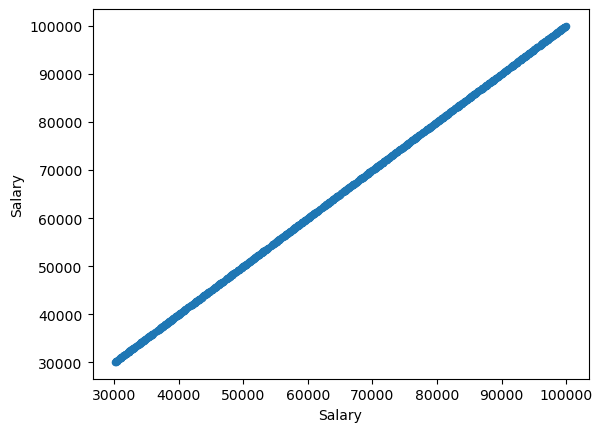

In [63]:
# check the outliers

df.plot.scatter(x='Salary', y='Salary')

<Axes: >

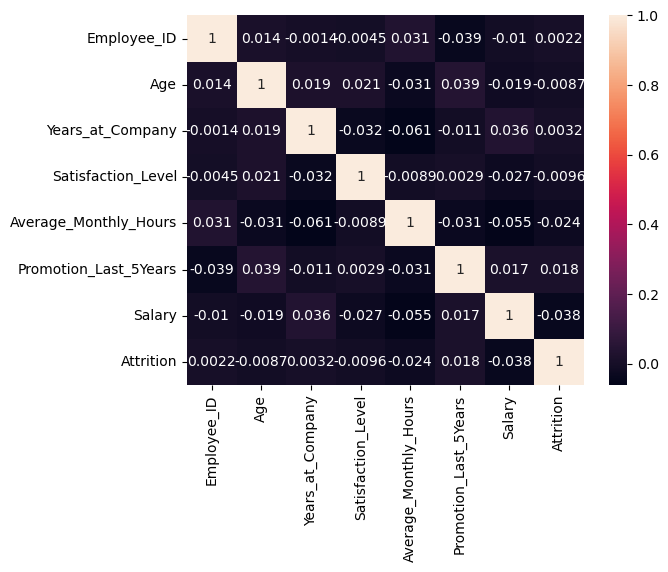

In [64]:
# plot heatmap to check the correlation

df.corr()
sns.heatmap(df.corr(), annot=True)

array([[<Axes: title={'center': 'Employee_ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years_at_Company'}>],
       [<Axes: title={'center': 'Satisfaction_Level'}>,
        <Axes: title={'center': 'Average_Monthly_Hours'}>,
        <Axes: title={'center': 'Promotion_Last_5Years'}>],
       [<Axes: title={'center': 'Salary'}>,
        <Axes: title={'center': 'Attrition'}>, <Axes: >]], dtype=object)

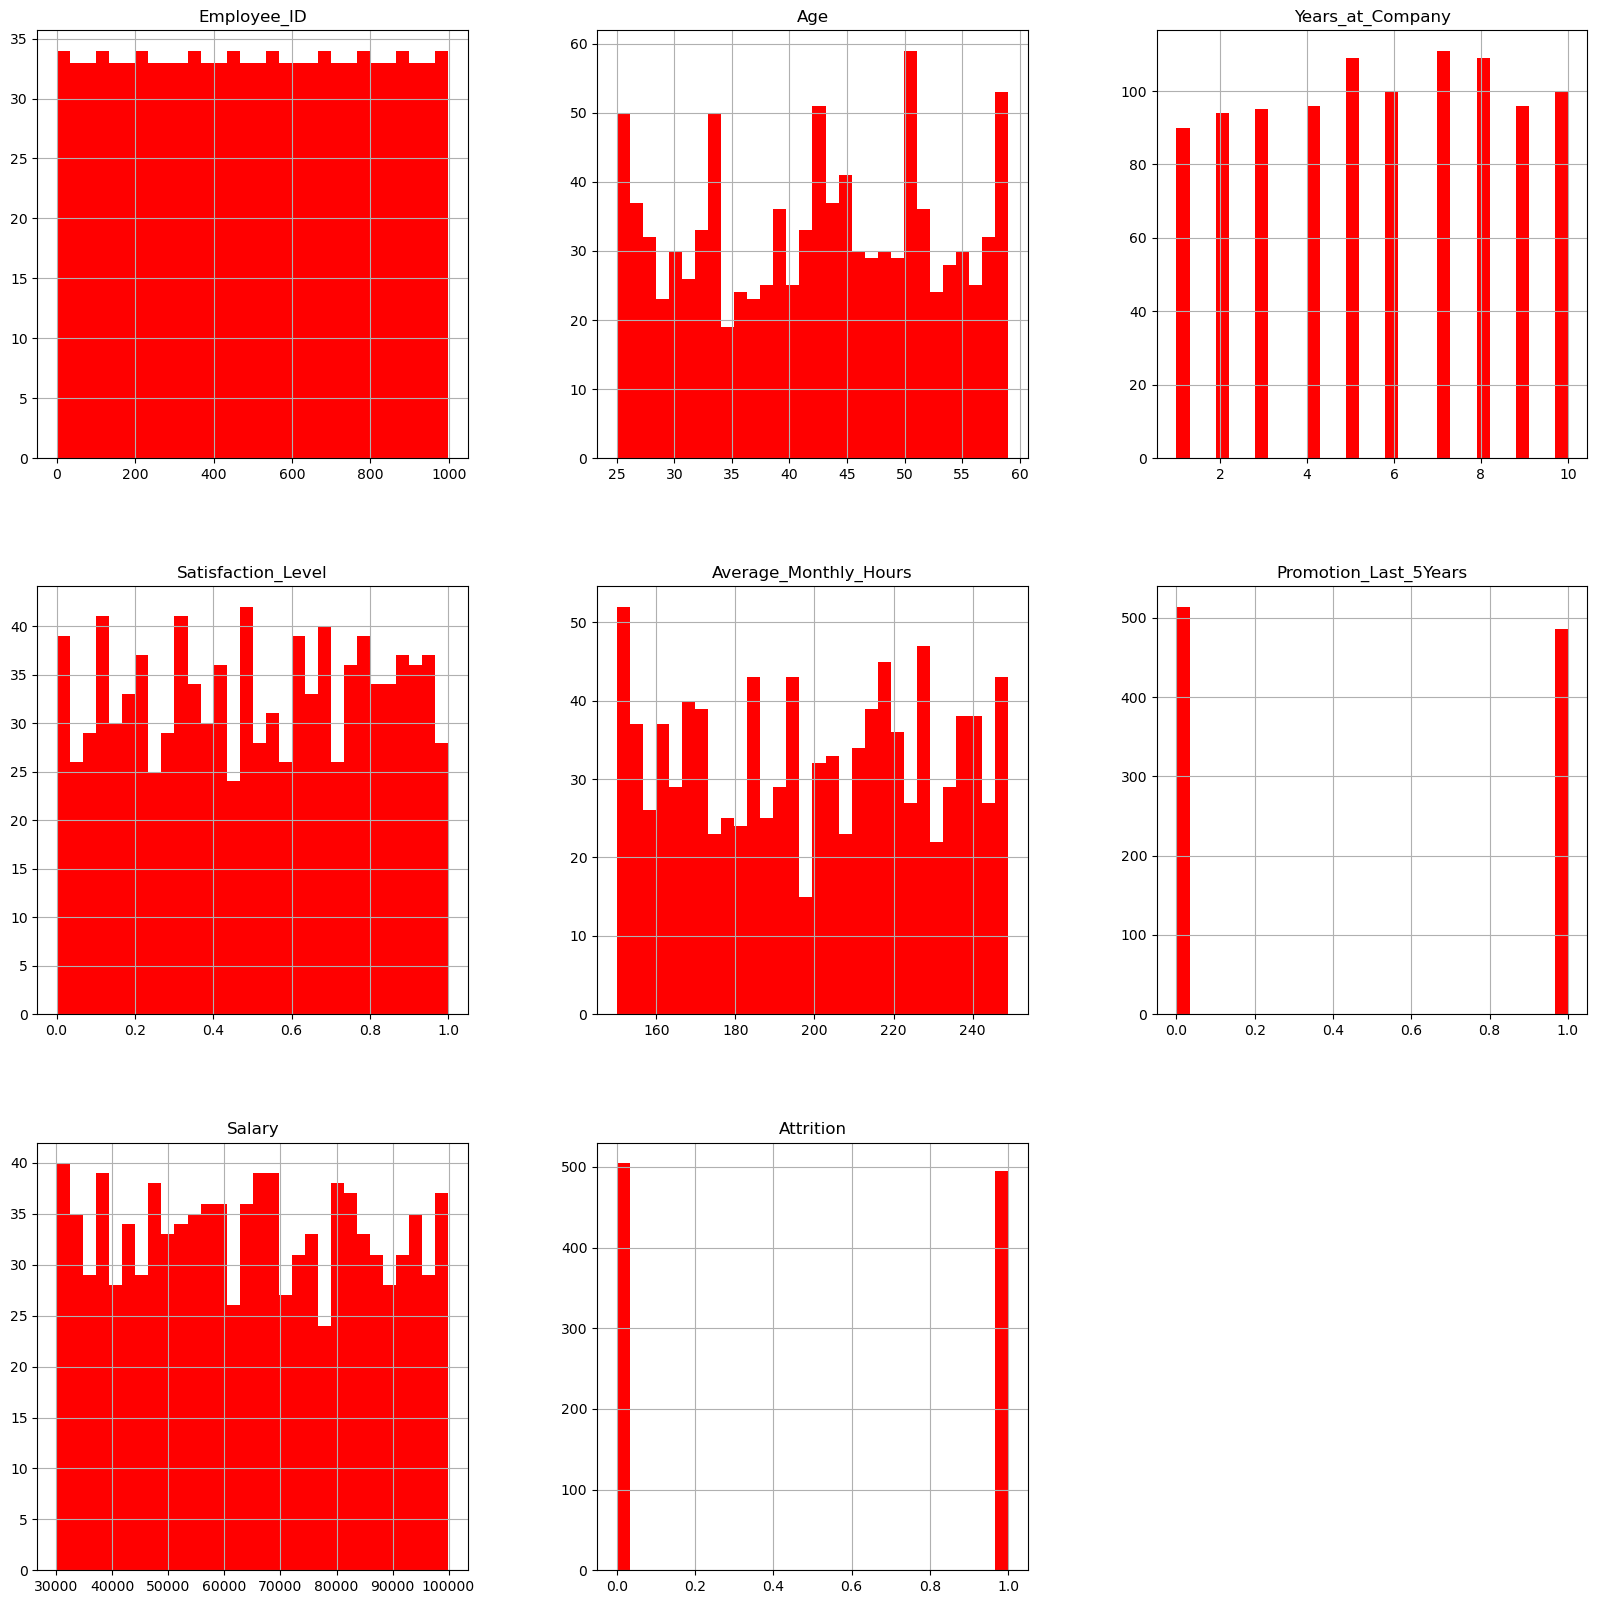

In [65]:
# check the distribution of the data

df.hist(bins=30, figsize=(20,20), color='r')


<Axes: xlabel='Department', ylabel='count'>

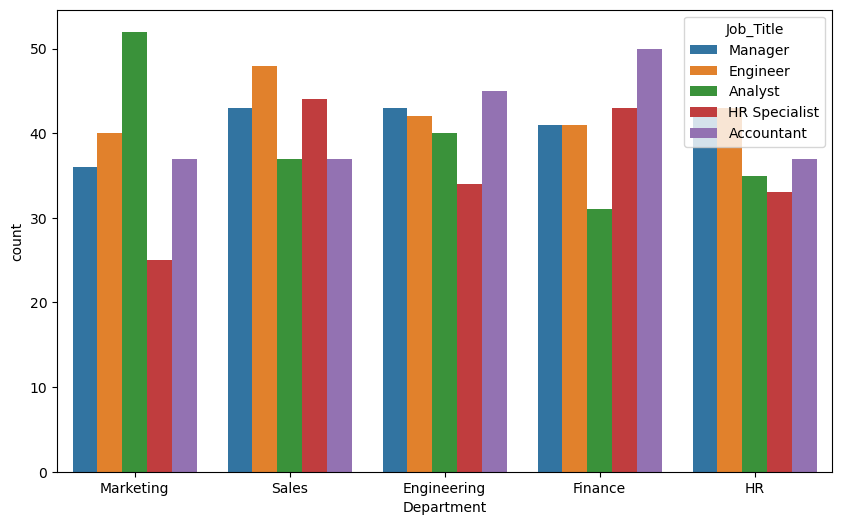

In [66]:
 # check the attrition rate by Department and Job_Title

plt.figure(figsize=[10,6])
sns.countplot(x='Department', hue='Job_Title', data=df)




<Axes: xlabel='Age', ylabel='Attrition'>

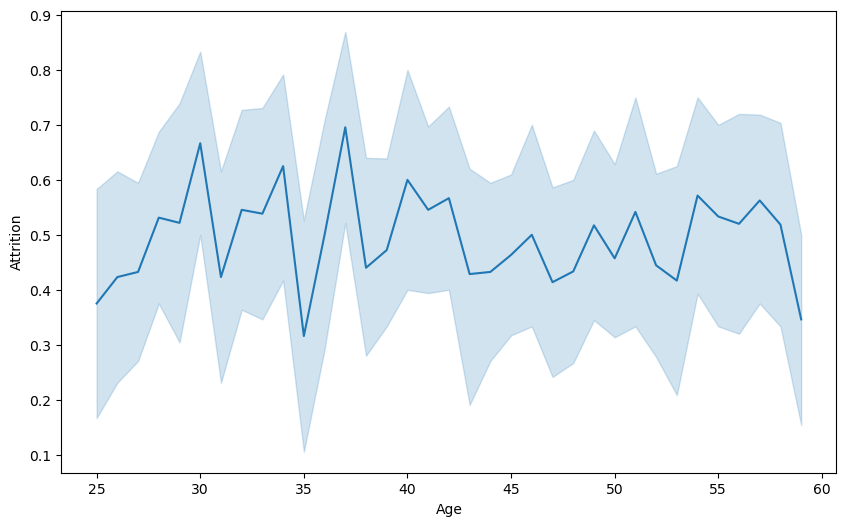

In [67]:
# cheack the attrition rate by age with line plot

plt.figure(figsize=[10,6])
sns.lineplot(x='Age', y='Attrition', data=df)


<Axes: xlabel='Gender', ylabel='Attrition'>

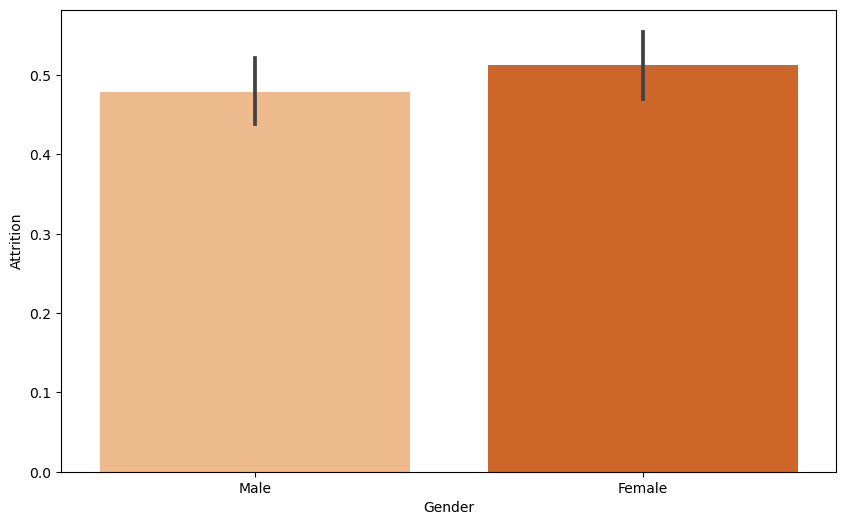

In [68]:
# check attrition rate by gender with bar plot orange color

plt.figure(figsize=[10,6])
sns.barplot(x='Gender', y='Attrition', data=df, palette='Oranges')


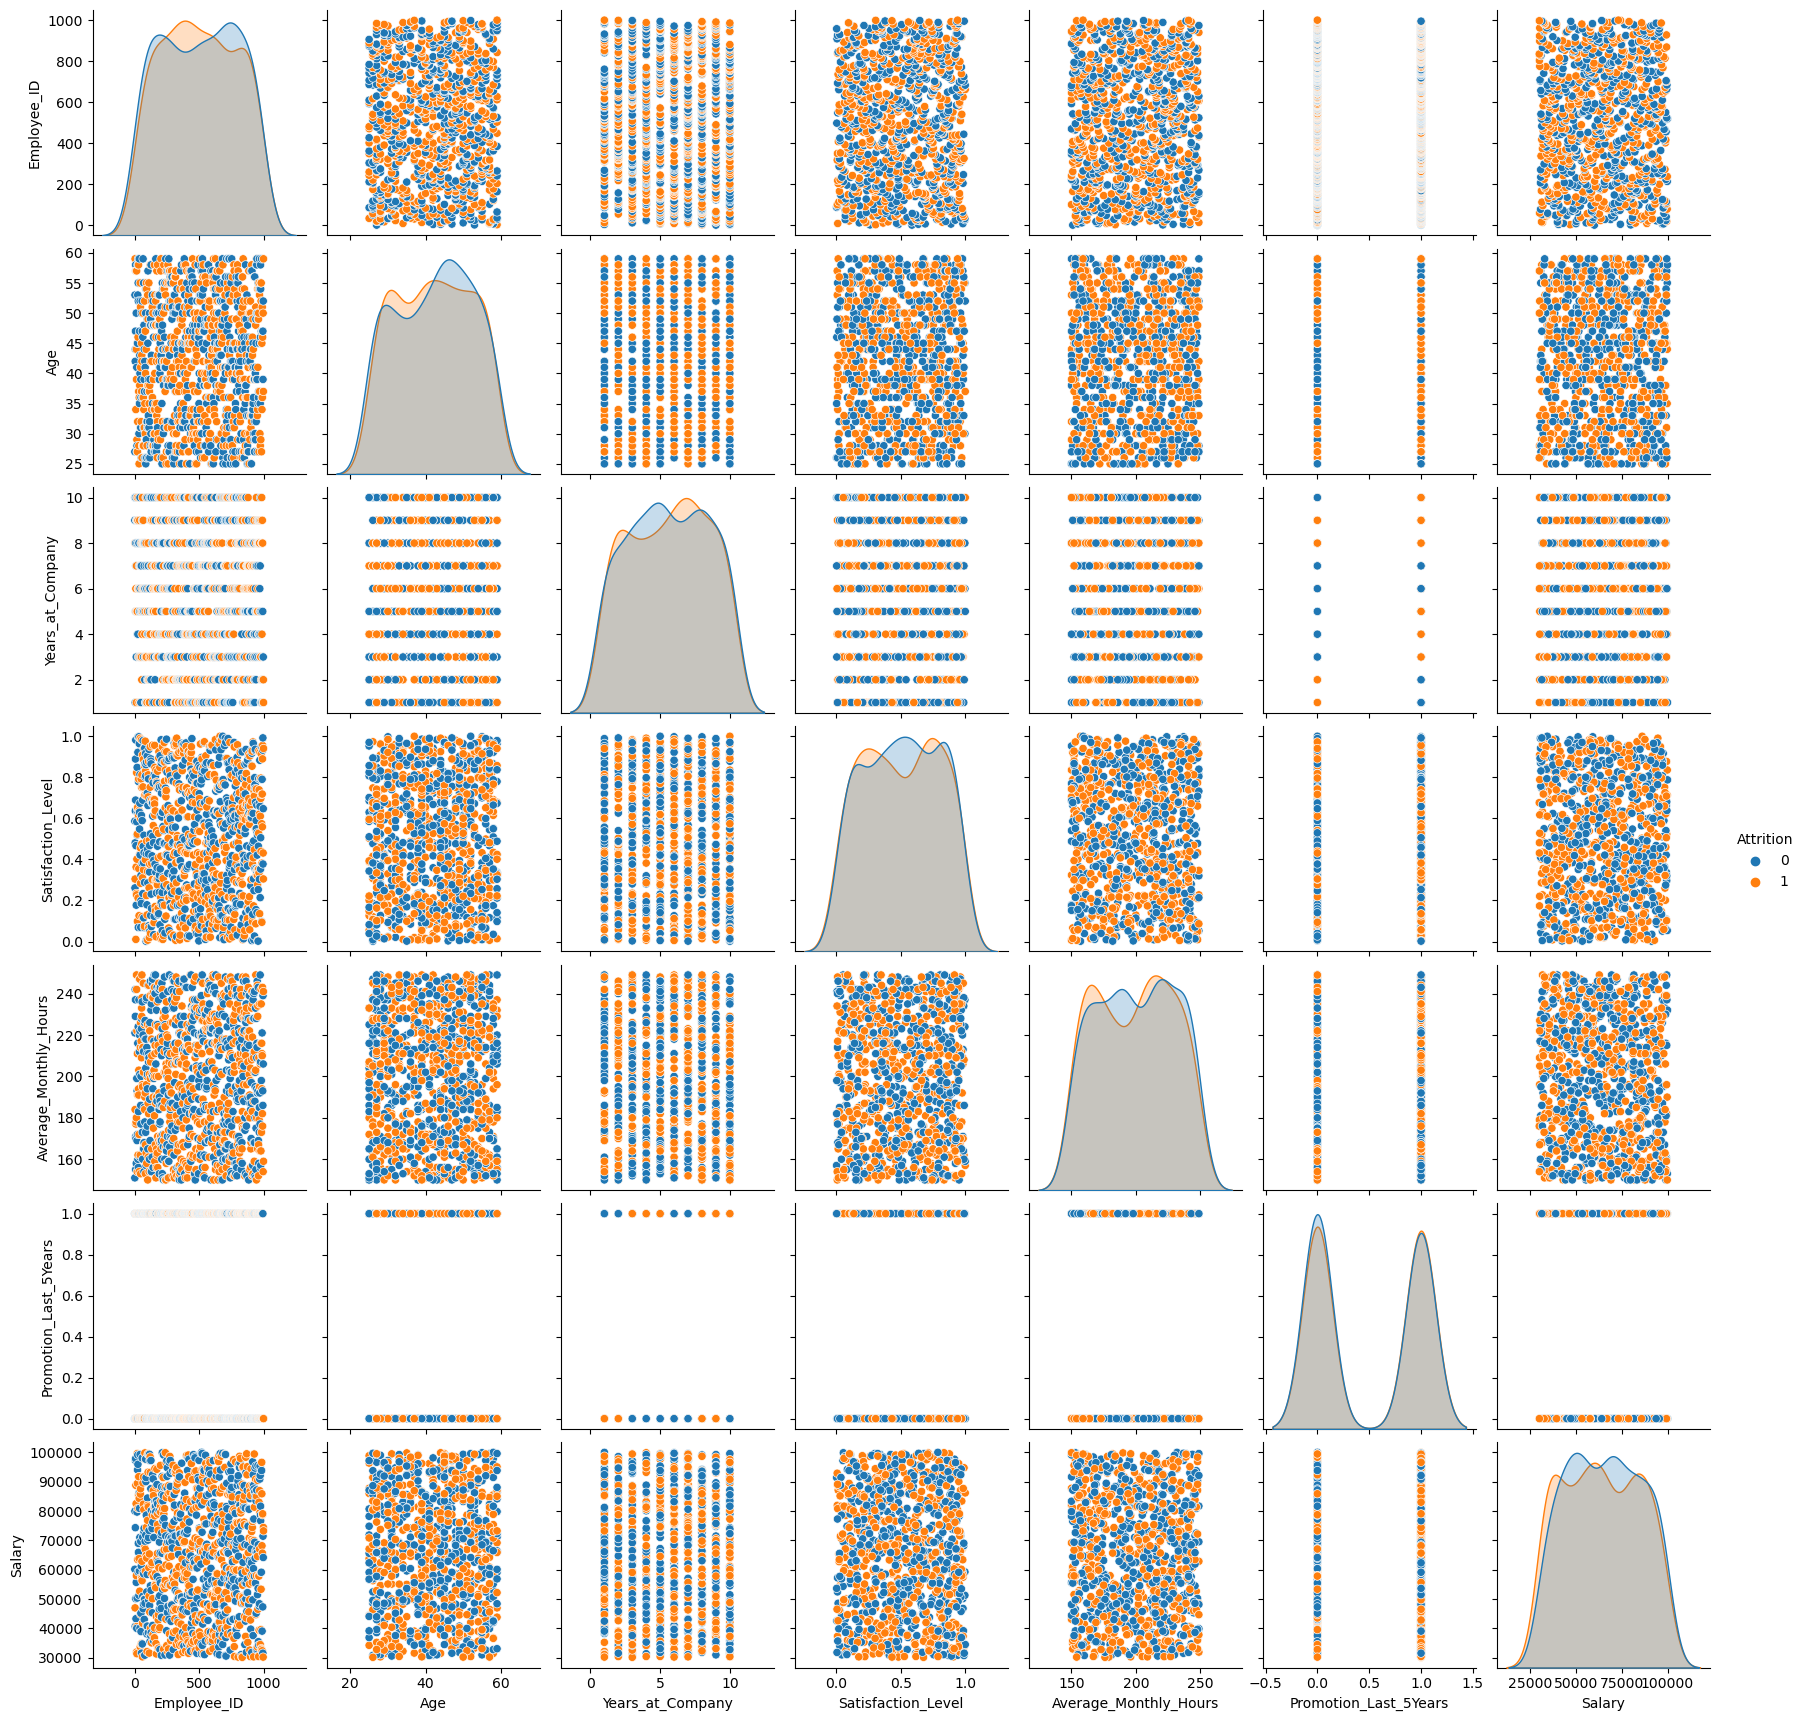

In [69]:
sns.pairplot(df, hue='Attrition')

In [70]:

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']


In [71]:
# Defining numerical and categorical columns
numerical_cols = ['Age', 'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years', 'Salary']
categorical_cols = ['Gender', 'Department', 'Job_Title']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)

[[ 1.57769477 -0.92349326  0.37558102 ...  0.          0.
   0.        ]
 [ 0.47895197 -0.56898529 -0.98010856 ...  0.          0.
   0.        ]
 [ 0.67872339 -1.6325092  -1.04224303 ...  0.          0.
   0.        ]
 ...
 [-0.42001941  1.55806253  0.89445242 ...  0.          0.
   1.        ]
 [-1.11921937 -0.21447732  0.02347314 ...  1.          0.
   0.        ]
 [ 1.47780906 -0.56898529  0.54047246 ...  0.          0.
   1.        ]]
[[ 0.47895197  0.49453862  1.32244924 ...  0.          0.
   1.        ]
 [ 0.37906626  1.20355456 -1.60965543 ...  0.          1.
   0.        ]
 [ 1.37792335  1.55806253 -0.34933815 ...  1.          0.
   0.        ]
 ...
 [ 0.47895197  0.84904659  0.86281859 ...  1.          0.
   0.        ]
 [ 0.7786091   0.84904659 -0.62912429 ...  0.          1.
   0.        ]
 [-0.71967653 -0.56898529  0.71445225 ...  0.          0.
   1.        ]]


In [73]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [74]:

# Train a lyzepredect model
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models



100%|██████████| 29/29 [00:01<00:00, 19.55it/s]

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.54,0.54,0.54,0.53,0.02
ExtraTreeClassifier,0.54,0.54,0.54,0.53,0.02
QuadraticDiscriminantAnalysis,0.51,0.50,0.50,0.36,0.00
DummyClassifier,0.51,0.50,0.50,0.34,0.02
XGBClassifier,0.50,0.50,0.50,0.50,0.07
LGBMClassifier,0.49,0.49,0.49,0.49,0.10
SGDClassifier,0.49,0.49,0.49,0.49,0.01
Perceptron,0.49,0.49,0.49,0.48,0.02
DecisionTreeClassifier,0.48,0.49,0.49,0.48,0.01


In [79]:

from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_processed, y, cv=5)
cv_scores.mean()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))




Accuracy:  0.44
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.46      0.46       102
           1       0.43      0.42      0.42        98

    accuracy                           0.44       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.44      0.44       200

